In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv',sep='\t')

In [16]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [17]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [18]:
df.shape

(5572, 4)

In [20]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

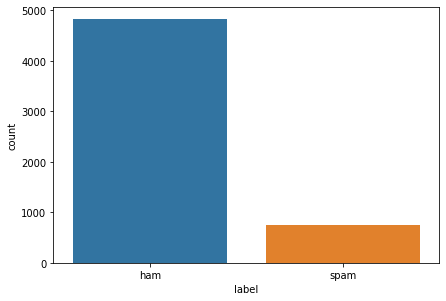

In [22]:
sns.countplot(x='label',data=df)
plt.tight_layout(pad=0)
plt.show()

The data set is highly imbalance.

In [30]:
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [31]:
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [35]:
ham=ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [36]:
final_df=spam.append(ham,ignore_index=True)

In [37]:
final_df['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

The dataset is balanced

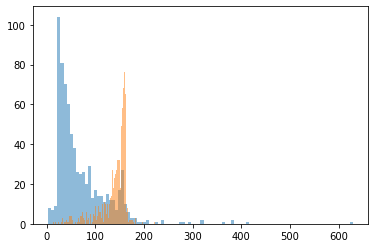

In [42]:
plt.hist(final_df[final_df['label']=='ham']['length'],bins=100,alpha=0.5)
plt.hist(final_df[final_df['label']=='spam']['length'],bins=100,alpha=0.5)
plt.show()

It shows that the ham message characters lies mostly within 20-40 character whereas spam lies mostly on 150-180

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [44]:
final_df.head(n=3)

,label,message,length,punct
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
1,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
2,spam,WINNER!! As a valued network customer you have...,157,6


In [55]:
X_train,X_test,y_train,y_test=train_test_split(final_df['message'],final_df['label'],test_size=0.20,random_state=0,shuffle=True,stratify=final_df['label'])

In [56]:
pipe=Pipeline([('tfidf',TfidfVectorizer()),('RF',RandomForestClassifier(n_estimators=100))])

In [57]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [60]:
y_pred=pipe.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[149,   1],
       [ 14, 135]])

In [66]:
print('acc:',accuracy_score(y_test,y_pred)*100)

acc: 94.98327759197325


In [67]:
pipe.predict(['You have won the match ticket for upcoming india match with the ticket number 45678'])

array(['ham'], dtype=object)

In [69]:
pipe.predict(['Free entry in 2 a wkly comp to win FA Cup final'])

array(['spam'], dtype=object)

In [73]:
svm_pipe=Pipeline([('tfidf',TfidfVectorizer()),('SVC',SVC(C=100,gamma='auto'))]) #c is the penalty

In [74]:
svm_pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('SVC',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

In [75]:
y_pred=pipe.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[149,   1],
       [ 14, 135]])

In [76]:
print('acc:',accuracy_score(y_test,y_pred)*100)

acc: 94.98327759197325


In [77]:
svm_pipe.predict(['U dun say so early hor... U c already then say..'])

array(['ham'], dtype=object)

In [78]:
svm_pipe.predict(['Had your mobile 11 months or more? U R entitle........'])

array(['spam'], dtype=object)